## Play around with clustering

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import datasets
from tracin import influence
from model  import load_mnist
from data   import mnist_data

# Get train and test data
train_X,train_Y,test_X,test_Y = mnist_data()

# Form model
eta = 0.001
model = load_mnist(is_compile=False)

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Calculate influences
MNIST_PATH = "mnist_influences_1000_1000.npy"
if not os.path.exists(MNIST_PATH):
    influences = influence(train_X[0:1000], train_Y[0:1000], 
                           train_X[0:1000], train_Y[0:1000], 
                           "model/mnist/model{}.hdf5",
                           model, eta, 20)
    np.save(MNIST_PATH, influences)
else:
    influences = np.load(MNIST_PATH)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Load the model
trained_model = load_mnist(is_compile=False)
trained_model.load_weights("model/mnist/model20.hdf5")

# Load the data
x = train_X[0:1000]
y = train_Y[0:1000]

# Find mislabeled samples
mislabeled = trained_model.predict(x).argmax(1) != y

In [43]:
x2 = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
pc_x = pd.DataFrame(data=pca.fit_transform(x2), columns=['PC1', 'PC2'])

In [80]:
print(["correct", "wrong"])
sns.color_palette()

['correct', 'wrong']


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

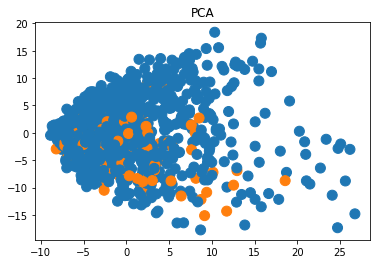

In [77]:
plt.scatter(pc_x["PC1"], pc_x["PC2"], s=100, c=colormap[mislabeled.astype("int")])

plt.title("PCA, color by mislabeled")
plt.show()

In [69]:
import seaborn as sns

print(np.unique(y))
sns.color_palette()

[0 1 2 3 4 5 6 7 8 9]


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

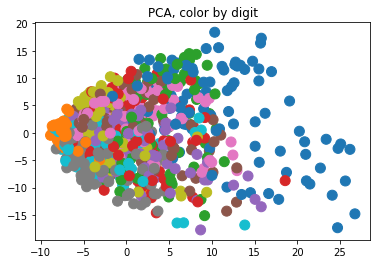

In [81]:
colormap = np.array(sns.color_palette())
plt.scatter(pc_x["PC1"], pc_x["PC2"], s=100, c=colormap[y])

plt.title("PCA, color by digit")
plt.show()